# mining_pisa_data
## by Jannis Jehmlich

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Interesting columns:
In a first inspection of the dataframe the shape revealed 636 columns. To reduce the complexity in the analysis and speed up the analysis I identified key columns on which I will focus.
I mainly focused on the maths grades as well as how homework and the parents influence the scores.


 - STIDSTD: Student ID
 - ST01Q01: International Grade
 - ST03Q01: Birth - Month
 - PARED: Highest parental education in years
 - OUTHOURS: Out-of-School Study Time
 - MISCED: Educational level of mother (ISCED)
 - FISCED: Educational level of father (ISCED)
 - MTSUP: Mathematics Teacher's Support
 - MMINS: Learning time (minutes per week)- Mathematics
 - HISCED: Highest educational level of parents
 - HEDRES: Home educational resources
 - FAILMAT: Attributions to Failure in Mathematics
 - AGE: Age of student
 - IC09Q06: Out-of-school 9 - Homework
 - ST89Q03: Attitude toward School - Prepare for College
 - ST89Q05: Attitude toward School - Trying Hard is Important
 - ST88Q02: Attitude towards School - Waste of Time
 - ST88Q01: Attitude towards School - Does Little to Prepare Me for Life
 - ST70Q02: No of class period p/wk - Maths
 - ST69Q02: Min in class period - Maths
 - ST57Q05: Out-of-School Study Time - With Parent
 - ST57Q01: Out-of-School Study Time - Homework
 - ST57Q02: Out-of-School Study Time - Guided Homework
 - ST57Q03: Out-of-School Study Time - Personal Tutor
 - ST57Q04: Out-of-School Study Time - Commercial Company
 - ST35Q04: Subjective Norms - Parents Believe Studying Mathematics Is Important
 - ST35Q05: Subjective Norms - Parents Believe Mathematics Is Important for Career
 - ST35Q06: Subjective Norms - Parents Like Mathematics
 - PV1MATH: Plausible value 1 in mathematics
 - PV2MATH: Plausible value 2 in mathematics
 - PV3MATH: Plausible value 3 in mathematics
 - PV4MATH: Plausible value 4 in mathematics
 - PV5MATH: Plausible value 5 in mathematics

In [13]:

cols_of_interest = ["CNT",
"NC",             
"STIDSTD",
"ST01Q01",
"ST03Q01",
"PARED",
"OUTHOURS",
"MISCED",
"FISCED",
"MTSUP",
"MMINS",
"HISCED",
"HEDRES",
"FAILMAT",
"AGE",
"IC09Q06",
"ST89Q03",
"ST89Q05",
"ST88Q02",
"ST88Q01",
"ST70Q02",
"ST69Q02",
"ST57Q05",
"ST57Q01",
"ST57Q02",
"ST57Q03",
"ST57Q04",
"ST35Q04",
"ST35Q05",
"ST35Q06",
"PV1MATH",
"PV2MATH",
"PV3MATH",
"PV4MATH",
"PV5MATH"]

In [14]:
#df = pd.read_csv("pisa2012.csv", encoding = "latin-1", dtype='unicode', index_col = False)
df = pd.read_csv("pisa2012.csv", encoding = "latin-1", dtype='unicode', index_col = False, usecols = cols_of_interest)

In [15]:
df.head(1)

CNT       NC STIDSTD ST01Q01 ST03Q01 ST35Q04 ST35Q05 ST35Q06 ST57Q01  \
0  Albania  Albania   00001      10      02   Agree   Agree   Agree     NaN   

  ST57Q02  ...             MISCED MMINS    MTSUP OUTHOURS PARED   PV1MATH  \
0     NaN  ...  ISCED 3A, ISCED 4   NaN  -0.9508      NaN    12  406.8469   

    PV2MATH   PV3MATH   PV4MATH   PV5MATH  
0  376.4683  344.5319  321.1637  381.9209  

[1 rows x 35 columns]

In [16]:
df.shape

(485490, 35)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 35 columns):
CNT         485490 non-null object
NC          485490 non-null object
STIDSTD     485490 non-null object
ST01Q01     485490 non-null object
ST03Q01     485490 non-null object
ST35Q04     315160 non-null object
ST35Q05     314843 non-null object
ST35Q06     313389 non-null object
ST57Q01     301367 non-null object
ST57Q02     269808 non-null object
ST57Q03     283813 non-null object
ST57Q04     279657 non-null object
ST57Q05     289502 non-null object
ST69Q02     298601 non-null object
ST70Q02     298339 non-null object
ST88Q01     311250 non-null object
ST88Q02     310964 non-null object
ST89Q03     311233 non-null object
ST89Q05     311138 non-null object
IC09Q06     291982 non-null object
AGE         485374 non-null object
FAILMAT     314448 non-null object
FISCED      452903 non-null object
HEDRES      477772 non-null object
HISCED      473091 non-null object
MISCED      46

All columns are strings. While this makes sense for some, the math test scores should be floats.

In [24]:
df.AGE[0]

'16.17'

In [25]:
float_cols = ["PV1MATH",
"PV2MATH",
"PV3MATH",
"PV4MATH",
"PV5MATH",
"AGE",
"ST01Q01",
"PARED",
"MMINS",
"OUTHOURS",
"MTSUP"]
# Converting the numerical columns into floats
for col in float_cols:
    df[col] = df[col].astype(float)

In [26]:
df.PV5MATH[0]

381.9209

In [29]:
# The column names are very non-descript and are changed:
names = {"PV1MATH": "MathResult1","PV2MATH": "MathResult2","PV3MATH": "MathResult3",
         "PV4MATH": "MathResult4","PV5MATH": "MathResult5","MISCED": "ed_lvl_mum",
         "FISCED": "ed_lvl_dad"
        }
df.rename(columns = names, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 35 columns):
CNT            485490 non-null object
NC             485490 non-null object
STIDSTD        485490 non-null object
ST01Q01        485490 non-null float64
ST03Q01        485490 non-null object
ST35Q04        315160 non-null object
ST35Q05        314843 non-null object
ST35Q06        313389 non-null object
ST57Q01        301367 non-null object
ST57Q02        269808 non-null object
ST57Q03        283813 non-null object
ST57Q04        279657 non-null object
ST57Q05        289502 non-null object
ST69Q02        298601 non-null object
ST70Q02        298339 non-null object
ST88Q01        311250 non-null object
ST88Q02        310964 non-null object
ST89Q03        311233 non-null object
ST89Q05        311138 non-null object
IC09Q06        291982 non-null object
AGE            485374 non-null float64
FAILMAT        314448 non-null object
ed_lvl_dad     452903 non-null object
HEDRES       

### Main dataset features:

The main dataset features are the grades which are the outcomes of most or all other columns.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Because the original dataset has over 600 columns, I reduced it to the columns with general inforamtion like age and country aswell as more specific columns related to the parents and situation at home of the student.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

OUTHOURS describes the hours a student works outside of school. The histogram is heavily skewed to the right with a maximum score of 180. 180 hours per week would mean 25.7 hours of work outside of scool per day, which is not possible.

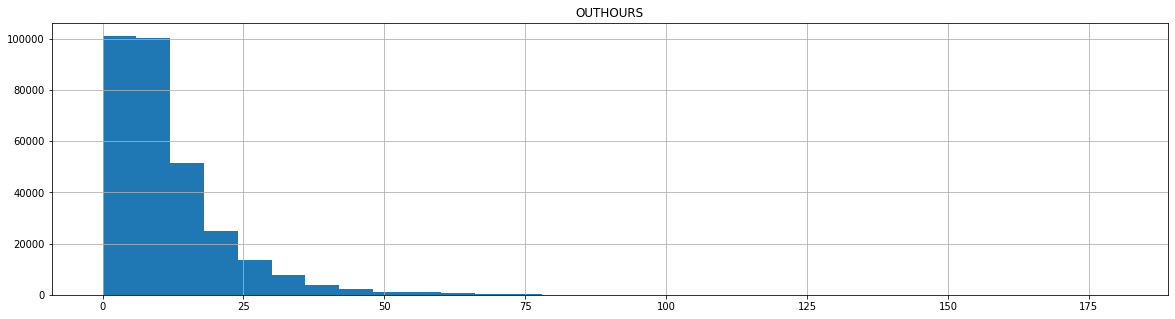

In [42]:

df.hist("OUTHOURS", figsize = (20,5), bins = 30);

In [44]:
df.OUTHOURS.describe()

count    308799.000000
mean         11.104100
std          10.476669
min           0.000000
25%           4.000000
50%           8.000000
75%          14.000000
max         180.000000
Name: OUTHOURS, dtype: float64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [46]:
180/7

25.714285714285715

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!